#Basic ANN using Pytorch
In this notebook, we will learn how to program a basic Neural Network based on the Pytorch library. The ANN will be classifier to classify Iris flowers in categories dependeing on physical criterias.

The learning and testing process will be done on the polular Iris.csv dataset.

The notebook is deiveded in 4 sections, which are the classic flowwork in deep-learning problems:

1. Loading and setting the dataset : splitting the datset in training and testing parts
2. Setting the ANN architecture
3. The learning process
4. Testing the performance of the ANN


We will be using OOP with Python to set the pytorch ANN.

We will also use Scikit-Learn library to easily split the data BEFORE the training process (Please keep this technique as a best paractice)

The used ANN uses the following parameters:

Input features = 4

Fully connected hidden layer 1 : 8 neurons

Fully connected hidden layer 2 : 8 neurons

output = 1 class


Creteria Loss : Cross Entropy

Optimizer : Adam

Starting Learning rate = 0.01

Epochs : 100

#Loading and setting the dataset : splitting the datset in training and testing parts

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We load the iris.csv file as dataset.
The dataset has 4 inputs : sepal and petal deimensions, and 1 output target which is the type of the iris.

In [ ]:
df = pd.read_csv('iris.csv')

In [ ]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [ ]:
df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
145     2.0  
146     2.0  
147     2.0  
148     2.0  
149     2.0

Let's plot the data with  color separation

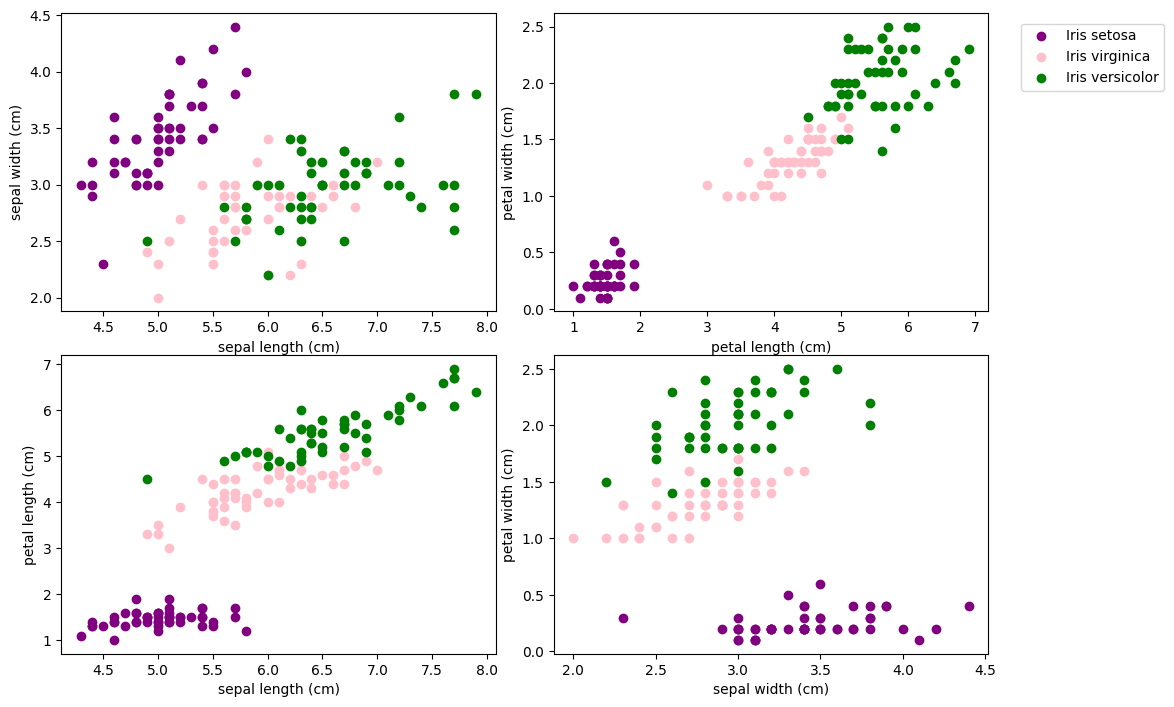

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['purple', 'pink', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

=> we see clearly that the setosa type is much easily separable from the two others

Saparation of the dataset into inputs and outputs (Values and targets)

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

Converting X and y into values using numpy

In [ ]:
X = X.values
y = y.values

**Splitting the Dataset into a Traing set and a Test set**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

**Converting theinputs into torch tensors**

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

The targets don't neet to be flaots as they categories, we convert these to Long

In [ ]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Our Dataset is Ready , next is Pytorching

#Defining the ANN model using Pytorch

We will construct an ANN with 2 fully connected layer (fc)
input layer ( 4 features) => Hidden1 N => Hidden2 N => output (3 classes or types)

We also set the propagation method in the class inheritence which is used both in the training and to prepare the testing

In [ ]:
class Model(nn.Module):

    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        #number of layers
        #Construction by inhereting from the class
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        #input layer ( 4 features) => Hidden1 N => Hidden2 N => output (3 classes or types)

    def forward(self,x):  # this function is the propagation method, here we define the activation function. 
                          # We pass x from one lyer to the next
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        # another way :
        #  a1 = F.relu(self.fc1(x))
        #  a2 = F.relu(self.fc2(a1))
        #  a3 = self.out(a2)

        return x

Attention : Initialize the weigths randomly in pytorch

In [ ]:
torch.manual_seed(33)

# ***TIME TO INSTANTIATE THE MODEL . YES!!!***

In [ ]:
model = Model()

# Parametrisation of the model :
Loss function,
Optimizer,
Epochs,

etc...

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 100
losses = [] # keep the loss with gradient
losses_no_g = [] # keep the loss without grad
losses.clear()

for i in range(epochs):

    #Forward and calculate a prediction
    y_pred = model.forward(X_train)
    
    loss=criterion(y_pred,y_train)
    
    # the detach method allow to keet the loss without the gradient
    loss_no_g = loss.detach()

    losses.append(loss)
    losses_no_g.append(loss_no_g)



    if i%10==0:
      print(f'Epoch{i} and loss is : {loss}')

    # Backpropagation and Gradien-descent
    optimizer.zero_grad() # we activate the gradient function of pytorch only for back-propagation
    loss.backward()
    optimizer.step()




Epoch0 and loss is : 1.1880278587341309
Epoch10 and loss is : 1.0545216798782349
Epoch20 and loss is : 0.9283751845359802
Epoch30 and loss is : 0.6566531658172607
Epoch40 and loss is : 0.4490240812301636
Epoch50 and loss is : 0.32752883434295654
Epoch60 and loss is : 0.21238765120506287
Epoch70 and loss is : 0.12857431173324585
Epoch80 and loss is : 0.08929704129695892
Epoch90 and loss is : 0.07297828048467636


In [ ]:
print(type(losses))
print(losses[1])

print(type(losses_no_g))
print(losses_no_g[1])


<class 'list'>
tensor(1.1359, grad_fn=<NllLossBackward0>)
<class 'list'>
tensor(1.1359)


Text(0.5, 0, 'Epoch')

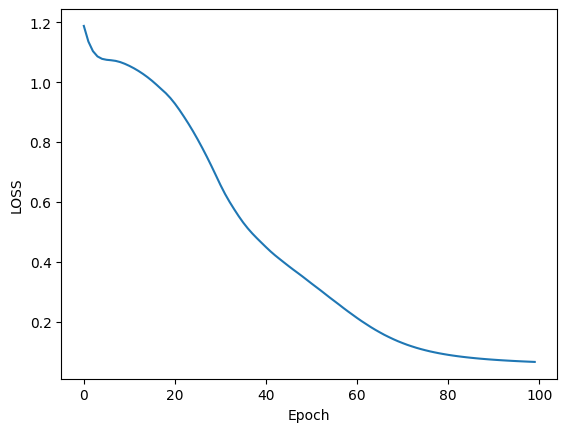

In [ ]:

plt.plot(range(epochs),losses_no_g)
plt.ylabel('LOSS')
plt.xlabel('Epoch')

# Congratulations : your model is trained

# NOW, we need to test our model

In [ ]:
with torch.no_grad():
  y_eval=model.forward(X_test)
  loss = criterion(y_eval,y_test)

loss

tensor(0.0692)

The loss is a little higher that the final convergence loss, we don't have too much overfitting

Now, let's test on all the test data

In [ ]:
# Extracting the tensor and comparing to real value
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    # 1.) 2.) 3.)
    print(f'{i+1} .)  {str(y_val)}   {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'We got {correct} correct!')

# Extracting max value in tensor and comparing to real value
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    # 1.) 2.) 3.)
    print(f'{i+1} .)  {str(y_val.argmax().item())}   {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'We got {correct} correct!')

1 .)  tensor([-2.0800,  4.3111, -1.1826])   1
2 .)  tensor([-1.8119,  4.9008, -1.8182])   1
3 .)  tensor([ 10.9045,   5.3399, -12.3725])   0
4 .)  tensor([-3.5184,  3.8715,  0.7172])   1
5 .)  tensor([-6.2254,  2.1951,  4.8639])   2
6 .)  tensor([-9.6186,  0.9250,  9.5116])   2
7 .)  tensor([ 11.0151,   5.5096, -12.5470])   0
8 .)  tensor([ 11.7352,   5.6532, -13.2854])   0
9 .)  tensor([-6.2419,  2.6067,  4.5606])   2
10 .)  tensor([-8.0338,  1.9554,  7.0257])   2
11 .)  tensor([-8.5780,  1.6329,  7.8457])   2
12 .)  tensor([ 10.6129,   5.0914, -12.0110])   0
13 .)  tensor([-8.0860,  1.7718,  7.2138])   2
14 .)  tensor([-3.4310,  3.8006,  0.6453])   1
15 .)  tensor([-6.7703,  2.5368,  5.2698])   2
16 .)  tensor([-1.8591,  4.6867, -1.6528])   1
17 .)  tensor([-4.9603,  3.0149,  2.9225])   2
18 .)  tensor([ 11.9254,   5.7130, -13.4909])   0
19 .)  tensor([-3.2332,  4.2259,  0.0824])   1
20 .)  tensor([-6.8102,  2.7440,  5.0270])   2
21 .)  tensor([ 11.1746,   5.3678, -12.6475])   0
22 .

Let'ts test with an aribitary Joker Iris

In [ ]:
joker_iris=torch.tensor([5.2,2.9,2.0,0.7])

Let's display it in the graph

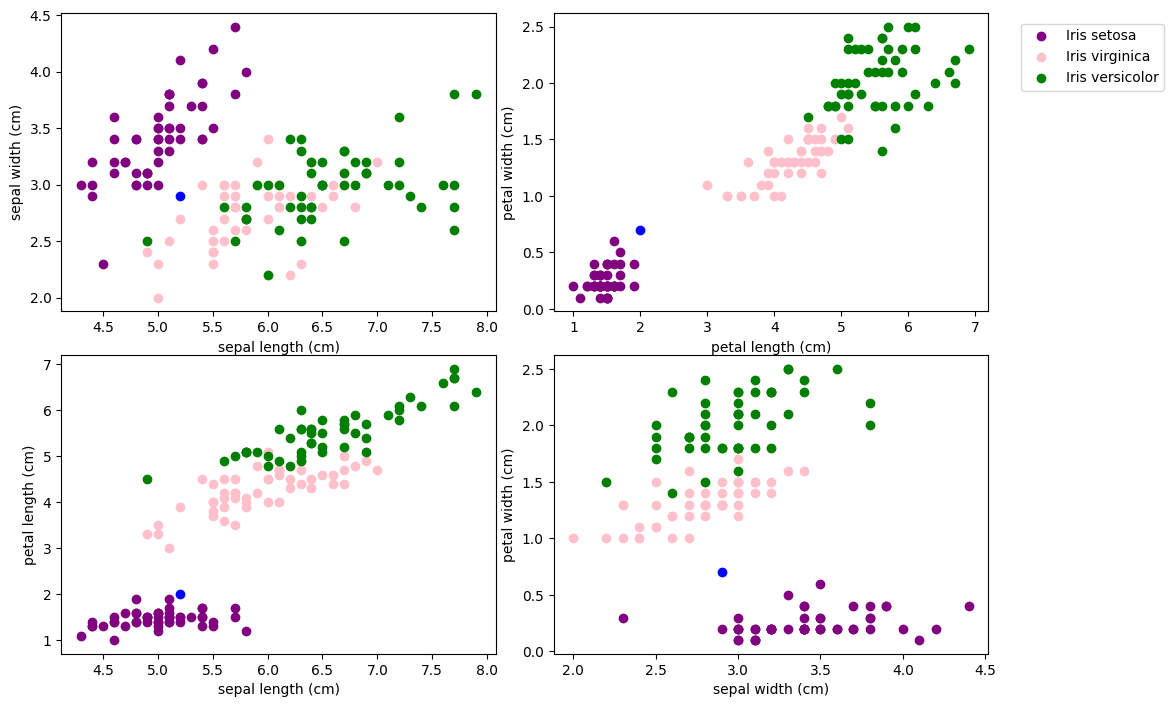

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['purple', 'pink', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    # we add our Joker Iris here
    ax.scatter(joker_iris[plots[i][0]],joker_iris[plots[i][1]], color='b')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

Let's use our ANN as a function : The joker Iris shoud be index 0

In [ ]:
with torch.no_grad():
  print(model(joker_iris))
  print(model(joker_iris).argmax())

tensor([ 7.6717,  5.1095, -9.4496])
tensor(0)


Let's display the model propertoies, sizes, layers,etc..)

In [ ]:
model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [ ]:
summary(model, (10, 4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 10, 8]              40
            Linear-2                [-1, 10, 9]              81
            Linear-3                [-1, 10, 3]              30
Total params: 151
Trainable params: 151
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


Let's save the model weigths

In [ ]:
torch.save(model.state_dict(),'iris_nn.pt')

let's reload the model

In [ ]:
n_model=Model()
n_model.load_state_dict(torch.load('iris_nn.pt'))

<All keys matched successfully>

In [ ]:
n_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

## Exercice : Transfer Learning : Make a new traning on the imported model : evaluate the convergence.

## That's all for today, Stay Tuned for next sessions




